# Baseline Logistic Regression Model

This notebook implements a baseline logistic regression model for fraud detection using the provided dataset.

PHASE 3 : BASELINE - RÉGRESSION LOGISTIQUE

[3.1] Chargement et préparation des données...
✓ Dataset chargé : (30000, 25)
✓ Colonnes : ['step', 'amount', 'age', 'is_fraud', 'hour_of_day', 'day_of_week', 'week_number', 'is_night', 'is_weekend', 'is_business_hours', 'amount_log', 'amount_sqrt', 'is_high_amount', 'is_very_high_amount', 'is_round_amount', 'is_senior', 'is_young', 'age_group_encoded', 'type_encoded', 'amount_per_age', 'night_high_amount', 'weekend_senior', 'night_senior', 'night_young', 'weekend_high_amount']

📊 Taux de fraude : 1.98% (595 fraudes sur 30000 transactions)
   - Classe 0 (légitime) : 29405 (98.02%)
   - Classe 1 (fraude)   : 595 (1.98%)

✓ Split effectué (80/20 stratifié) :
   - Train : 24000 samples
   - Val   : 6000 samples
   - Fraudes train : 476 (1.98%)
   - Fraudes val   : 119 (1.98%)
✓ Scaler sauvegardé : ../models/scaler.pkl

[3.2] Entraînement du modèle baseline...
✓ Modèle entraîné en 1.39 secondes
✓ Nombre d'itérations : 42
✓ Modèle sauvegardé : ../

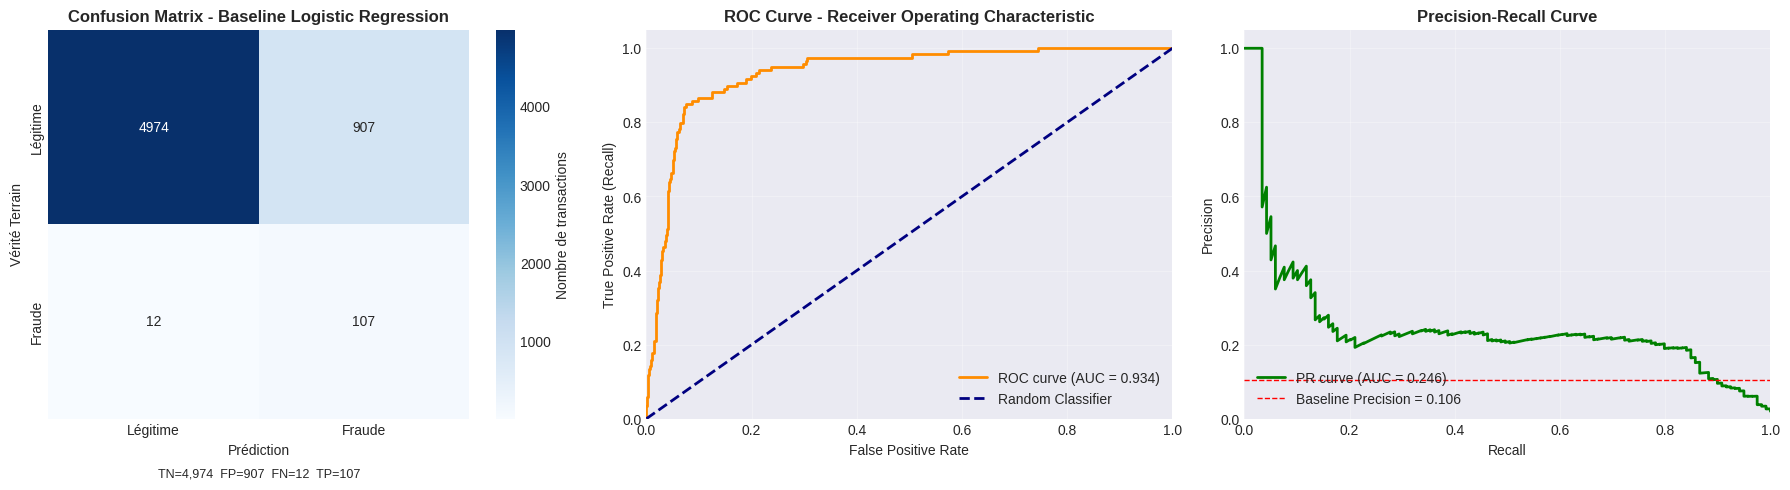


✅ PHASE 3 TERMINÉE - BASELINE ÉTABLIE

📈 F1-SCORE BASELINE : 0.1889
⏱️  Temps d'entraînement : 1.39s
📂 Fichiers générés :
   - ../models/baseline_logistic.pkl
   - ../models/scaler.pkl
   - ../models/baseline_metrics.csv
   - ../visualizations/baseline_evaluation.png

🎯 Prochaine étape : PHASE 4 - Modèles avancés (Random Forest, XGBoost)


In [8]:
# ========================================
# PHASE 3 : BASELINE - RÉGRESSION LOGISTIQUE
# Durée estimée : 60 minutes
# ========================================

# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    precision_score, 
    recall_score, 
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)
import joblib

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*60)
print("PHASE 3 : BASELINE - RÉGRESSION LOGISTIQUE")
print("="*60)

# ========================================
# 3.1 PRÉPARATION DES DONNÉES (10 min)
# ========================================
print("\n[3.1] Chargement et préparation des données...")

# Load the processed training data
train_data = pd.read_csv('../data/processed/train_engineered.csv')

print(f"✓ Dataset chargé : {train_data.shape}")
print(f"✓ Colonnes : {train_data.columns.tolist()}")

# Define features and target variable
X = train_data.drop('is_fraud', axis=1)
y = train_data['is_fraud']

# Vérifier le déséquilibre des classes
fraud_rate = y.mean() * 100
print(f"\n📊 Taux de fraude : {fraud_rate:.2f}% ({y.sum()} fraudes sur {len(y)} transactions)")
print(f"   - Classe 0 (légitime) : {(y==0).sum()} ({(y==0).mean()*100:.2f}%)")
print(f"   - Classe 1 (fraude)   : {(y==1).sum()} ({(y==1).mean()*100:.2f}%)")

# Split the data into training and validation sets (STRATIFIÉ)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ⚠️ CRITIQUE pour données déséquilibrées
)

print(f"\n✓ Split effectué (80/20 stratifié) :")
print(f"   - Train : {X_train.shape[0]} samples")
print(f"   - Val   : {X_val.shape[0]} samples")
print(f"   - Fraudes train : {y_train.sum()} ({y_train.mean()*100:.2f}%)")
print(f"   - Fraudes val   : {y_val.sum()} ({y_val.mean()*100:.2f}%)")

# Standardisation des features (IMPORTANT pour Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # FIT sur train uniquement
X_val_scaled = scaler.transform(X_val)          # TRANSFORM sur val

# Sauvegarder le scaler pour plus tard (test set)
joblib.dump(scaler, '../models/scaler.pkl')
print("✓ Scaler sauvegardé : ../models/scaler.pkl")

# ========================================
# 3.2 ENTRAÎNEMENT BASELINE (5 min)
# ========================================
print("\n[3.2] Entraînement du modèle baseline...")

# Initialiser le modèle
model = LogisticRegression(
    max_iter=1000,      # Assurer la convergence
    random_state=42,    # Reproductibilité
    class_weight='balanced',  # ⭐ Gérer le déséquilibre
    solver='lbfgs',     # Solver par défaut efficace
    n_jobs=-1           # Parallélisation
)

# Mesurer le temps d'entraînement
start_time = time.time()
model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"✓ Modèle entraîné en {training_time:.2f} secondes")
print(f"✓ Nombre d'itérations : {model.n_iter_[0]}")

# Sauvegarder le modèle
joblib.dump(model, '../models/baseline_logistic.pkl')
print("✓ Modèle sauvegardé : ../models/baseline_logistic.pkl")

# ========================================
# 3.3 PRÉDICTIONS (5 min)
# ========================================
print("\n[3.3] Génération des prédictions...")

# Prédictions binaires (0 ou 1)
y_pred = model.predict(X_val_scaled)

# Prédictions probabilistes (pour ROC/PR curves)
y_proba = model.predict_proba(X_val_scaled)[:, 1]  # Probabilité classe 1

print(f"✓ Prédictions générées : {len(y_pred)} samples")
print(f"✓ Fraudes prédites : {y_pred.sum()} ({y_pred.mean()*100:.2f}%)")

# ========================================
# 3.4 CALCUL DES MÉTRIQUES (15 min)
# ========================================
print("\n[3.4] Calcul des métriques de performance...")
print("="*60)

# Métriques principales
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

# Affichage formaté
print(f"\n🎯 MÉTRIQUES BASELINE - RÉGRESSION LOGISTIQUE")
print(f"{'='*60}")
print(f"{'Métrique':<20} {'Score':>10} {'Interprétation':<30}")
print(f"{'-'*60}")
print(f"{'F1-Score':<20} {f1:>10.4f} {'⭐ MÉTRIQUE PRINCIPALE':<30}")
print(f"{'Precision':<20} {precision:>10.4f} {'% fraudes bien détectées':<30}")
print(f"{'Recall':<20} {recall:>10.4f} {'% fraudes capturées':<30}")
print(f"{'Accuracy':<20} {accuracy:>10.4f} {'⚠️ Trompeur (déséquilibré)':<30}")
print(f"{'ROC-AUC':<20} {roc_auc:>10.4f} {'Capacité discrimination':<30}")
print(f"{'='*60}")

# Classification Report détaillé
print("\n📋 CLASSIFICATION REPORT DÉTAILLÉ :")
print(classification_report(y_val, y_pred, target_names=['Légitime', 'Fraude']))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n📊 CONFUSION MATRIX :")
print(f"{'='*60}")
print(f"                  Prédit Légitime | Prédit Fraude")
print(f"{'-'*60}")
print(f"Vrai Légitime     {tn:>15,} | {fp:>13,}  (FP)")
print(f"Vrai Fraude (FN)  {fn:>15,} | {tp:>13,}  (TP)")
print(f"{'='*60}")

# ========================================
# 3.6 ANALYSE FP/FN (10 min)
# ========================================
print(f"\n[3.6] Analyse des erreurs (False Positives vs False Negatives)...")
print("="*60)

total_frauds = y_val.sum()
false_negatives_rate = (fn / total_frauds) * 100 if total_frauds > 0 else 0
false_positives_rate = (fp / (tn + fp)) * 100 if (tn + fp) > 0 else 0

print(f"\n🔴 FALSE NEGATIVES (Fraudes NON détectées) :")
print(f"   - Nombre : {fn}")
print(f"   - Taux : {false_negatives_rate:.2f}% des fraudes réelles")
print(f"   - Impact : ⚠️ CRITIQUE - Perte financière directe")

print(f"\n🟡 FALSE POSITIVES (Fausses alertes) :")
print(f"   - Nombre : {fp}")
print(f"   - Taux : {false_positives_rate:.2f}% des transactions légitimes")
print(f"   - Impact : 😠 Frustration client (blocage injustifié)")

print(f"\n✅ TRUE POSITIVES (Fraudes détectées) :")
print(f"   - Nombre : {tp}")
print(f"   - Taux de détection : {recall*100:.2f}%")

print(f"\n💡 ANALYSE :")
if recall < 0.6:
    print(f"   ⚠️ Le modèle rate {false_negatives_rate:.1f}% des fraudes.")
    print(f"   → Priorité : Améliorer le RECALL (Feature Engineering, SMOTE)")
elif precision < 0.6:
    print(f"   ⚠️ Trop de fausses alertes ({fp} FP).")
    print(f"   → Priorité : Améliorer la PRECISION (Ajuster seuil, features)")
else:
    print(f"   ✓ Équilibre acceptable entre Precision et Recall")

# Sauvegarder les métriques dans un fichier
metrics_dict = {
    'model': 'Logistic Regression Baseline',
    'f1_score': f1,
    'precision': precision,
    'recall': recall,
    'accuracy': accuracy,
    'roc_auc': roc_auc,
    'true_positives': int(tp),
    'false_positives': int(fp),
    'true_negatives': int(tn),
    'false_negatives': int(fn),
    'training_time_sec': training_time
}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df.to_csv('../models/baseline_metrics.csv', index=False)
print("\n✓ Métriques sauvegardées : ../models/baseline_metrics.csv")

# ========================================
# 3.5 VISUALISATIONS (15 min)
# ========================================
print("\n[3.5] Génération des visualisations...")

# Créer une figure avec 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- GRAPHIQUE 1 : Confusion Matrix Heatmap ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Légitime', 'Fraude'],
            yticklabels=['Légitime', 'Fraude'],
            cbar_kws={'label': 'Nombre de transactions'})
axes[0].set_title('Confusion Matrix - Baseline Logistic Regression', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Vérité Terrain', fontsize=10)
axes[0].set_xlabel('Prédiction', fontsize=10)

# Ajouter annotations contextuelles
axes[0].text(0.5, -0.15, f'TN={tn:,}  FP={fp:,}  FN={fn:,}  TP={tp:,}', 
             ha='center', transform=axes[0].transAxes, fontsize=9)

# --- GRAPHIQUE 2 : ROC Curve ---
fpr, tpr, _ = roc_curve(y_val, y_proba)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=10)
axes[1].set_ylabel('True Positive Rate (Recall)', fontsize=10)
axes[1].set_title('ROC Curve - Receiver Operating Characteristic', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

# --- GRAPHIQUE 3 : Precision-Recall Curve ---
precisions, recalls, _ = precision_recall_curve(y_val, y_proba)
pr_auc = auc(recalls, precisions)
axes[2].plot(recalls, precisions, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
axes[2].axhline(y=precision, color='red', linestyle='--', lw=1, label=f'Baseline Precision = {precision:.3f}')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('Recall', fontsize=10)
axes[2].set_ylabel('Precision', fontsize=10)
axes[2].set_title('Precision-Recall Curve', fontsize=12, fontweight='bold')
axes[2].legend(loc="lower left")
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/baseline_evaluation.png', dpi=300, bbox_inches='tight')
print("✓ Visualisations sauvegardées : ../visualizations/baseline_evaluation.png")
plt.show()

# ========================================
# RÉSUMÉ FINAL
# ========================================
print("\n" + "="*60)
print("✅ PHASE 3 TERMINÉE - BASELINE ÉTABLIE")
print("="*60)
print(f"\n📈 F1-SCORE BASELINE : {f1:.4f}")
print(f"⏱️  Temps d'entraînement : {training_time:.2f}s")
print(f"📂 Fichiers générés :")
print(f"   - ../models/baseline_logistic.pkl")
print(f"   - ../models/scaler.pkl")
print(f"   - ../models/baseline_metrics.csv")
print(f"   - ../visualizations/baseline_evaluation.png")
print("\n🎯 Prochaine étape : PHASE 4 - Modèles avancés (Random Forest, XGBoost)")
print("="*60)